In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Define the sign
def sign(x):
    if (x >= 0):
        return 1
    else:
        return -1

In [25]:
# Run network function
# Input: The network state and weights
# Output: The updated network state and visualization information
def run(network, weights):
    n = len(network)
    vis = []
    for t in range(30):
        x = np.array(range(n))
        np.random.shuffle(x)
        vis.append(network.copy())
        for i in x:
            h = 0
            for j in range(n):
                h += weights[i,j]*network[j]
            network[i] = sign(h)
    return network, vis

In [26]:
n = 10
# Initialize the weights
weights = np.random.choice([-1,0,1], (n,n))

# Ensure that there is no self-action
for i in range(n):
    weights[i,i] = 0

# Ensure symmetric weights
for i in range(n):
    for j in range(i,n):
        weights[j,i] = weights[i,j]

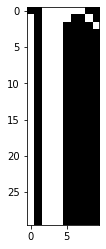

In [27]:
# Initialize a network state
network = np.random.choice([-1,1], n)

# Run the network
network, vis = run(network, weights)

# Plot the changes in network state over time
plt.imshow(vis, cmap="binary")

In [28]:
# Calculate the energy, given the network's state and the weights
def calculate_energy(network, weights):
    energy = 0.0
    n = len(network)
    for i in range(n):
        for j in range(n):
            energy += weights[i,j]*network[i]*network[j]
    energy *= -0.5
    return energy

print(calculate_energy(network, weights))

-16.0


-16.0


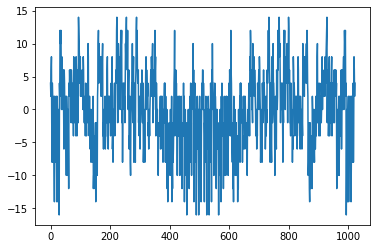

In [31]:
# Loop over all possible state values and calculate energies
# Keep all energies and plot them
energies = []
min_e = 1000

for i in range(int(2**n)):
    pnet = [2*int(x)-1 for x in reversed(bin(i)[2:].zfill(n))]
    # Fill in the rest here, finding the minimum state value along the way
    energy = calculate_energy(pnet, weights)
    energies.append(energy)
    if (energy < min_e):
        min_e = energy
        min_state = pnet

plt.plot(range(len(energies)), energies)
print(min_e)

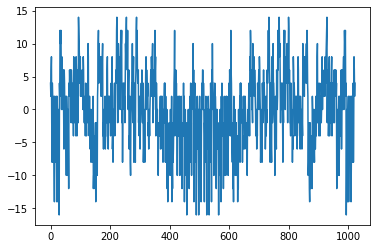

In [32]:
plt.plot(range(int(2**n)), energies)

In [34]:
# Calculating basins of attraction
attractors = {}

for i in range(int(2**n)):
    pnet = [2*int(x)-1 for x in reversed(bin(i)[2:].zfill(n))]
    # Fill in the rest here
    net, vis = run(pnet, weights)
    snet = str(net)
    if (snet not in attractors.keys()):
        attractors[snet] = []
    attractors[snet].append(pnet)

In [37]:
# Print which points are attractors, their energy values, and
# the size of their basins of attraction
for k in attractors.keys():
    net = [int(x) for x in k.strip('[]').split(',')]
    print(k, len(attractors[k]), calculate_energy(net, weights))

[1, -1, 1, 1, 1, -1, -1, -1, -1, -1] 106 -16.0
[1, -1, 1, 1, -1, -1, -1, -1, -1, 1] 46 -16.0
[1, -1, 1, -1, 1, 1, -1, -1, -1, 1] 172 -16.0
[-1, -1, -1, 1, 1, -1, -1, 1, 1, -1] 105 -14.0
[-1, 1, -1, 1, -1, 1, 1, 1, 1, -1] 188 -16.0
[-1, 1, -1, -1, -1, 1, 1, 1, 1, 1] 141 -16.0
[1, 1, 1, -1, -1, 1, 1, -1, 1, 1] 149 -14.0
[-1, 1, -1, -1, 1, 1, 1, 1, 1, -1] 117 -16.0
